In [1]:
import pandas as pd
import datetime as dt
import random
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
nasData = pd.read_csv("NAS.csv")
nasData.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
4,2003-12-24,NaN,NaN,NaN,NaN,NaN,NaN
5,2003-12-25,NaN,NaN,NaN,NaN,NaN,NaN
6,2003-12-26,NaN,NaN,NaN,NaN,NaN,NaN
7,2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0
8,2003-12-30,17.425800,17.882900,17.425800,17.711500,17.711500,67298.0
9,2003-12-31,NaN,NaN,NaN,NaN,NaN,NaN


# Feature engineering

In [3]:
nasData = nasData.dropna(axis="rows")
nasData

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
7,2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0
...,...,...,...,...,...,...,...
4248,2020-10-12,0.709000,0.710000,0.650000,0.676800,0.676800,48320475.0
4249,2020-10-13,0.676800,0.676800,0.600000,0.600600,0.600600,47786200.0
4250,2020-10-14,0.601000,0.640000,0.596200,0.626000,0.626000,37534949.0
4251,2020-10-15,0.626000,0.626000,0.585000,0.605000,0.605000,26737615.0


In [4]:
dato = nasData['Date']
dato = pd.to_datetime(dato)
dato = dato.map(dt.datetime.toordinal) #mapping the dates to integers
inputData = dato.to_frame()

In [5]:
#We are looking at the prise at adjusting closing prise
closingPrice = nasData['Adj Close']

# Training the model

In [6]:
model = linear_model.LinearRegression()
model.fit(inputData,closingPrice)

LinearRegression()

# Vizualizing the linear fit with the data points

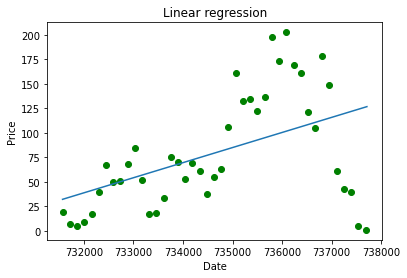

In [8]:
plt.title('Linear regression')
plt.xlabel('Date')
plt.ylabel('Price')
plt.scatter(dato[::100], closingPrice[::100], color = 'green')
plt.plot(inputData, model.predict(inputData))
plt.show()

In [9]:
#function to map date to integer
def convertDate(day):
    date = pd.to_datetime(day)
    return dt.datetime.toordinal(date)
#function for generating a random date
def randomDate(start, stopp):
    time_between_dates = end_date - start_date
    days_between_dates = time_between_dates.days
    random_number_of_days = random.randrange(days_between_dates)
    random_date = start_date + dt.timedelta(days=random_number_of_days)
    return random_date

In [10]:
#sending in random date
start_date = dt.date(2021, 1, 1)
end_date = dt.date(2021, 12, 30)

dag1 = randomDate(start_date, end_date)
dag2 = randomDate(start_date, end_date)
print(f"Day one: {dag1}  Day two: {dag2}")

Day one: 2021-05-21  Day two: 2021-08-12


In [11]:
print(f"Predicted stock price at date ({dag1}) is :{model.predict([[convertDate(dag1)]])[0]:.2f}")
print(f"Predicted stock price at date ({dag2}) is :{model.predict([[convertDate(dag2)]])[0]:.2f}")

Predicted stock price at date (2021-05-21) is :130.21
Predicted stock price at date (2021-08-12) is :131.49
